#### load in modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

#### read in output from simulated sampling

In [11]:
# function to read in all detection_probs csv files at different Ts for a given experiment
def read_detection_probs(indir):
    dfs = []
    for f in os.listdir(indir):
        if f.startswith('T') and os.path.isdir(os.path.join(indir, f)):
            observation_time = int(f.split('T')[1])
            df = pd.read_csv(os.path.join(indir, f, 'detection_probs.median_95CI.csv'))
            df['observe_time'] = observation_time
            dfs.append(df)

    # combine dfs
    combined_df = pd.concat(dfs)
    # replace NA values with 0
    combined_df = combined_df.fillna(0)

    return combined_df

In [14]:
# read in output from simulated sampling
no_recovery_output_df = read_detection_probs('./results/no_recovery')
with_recovery_output_df = read_detection_probs('./results/with_recovery')

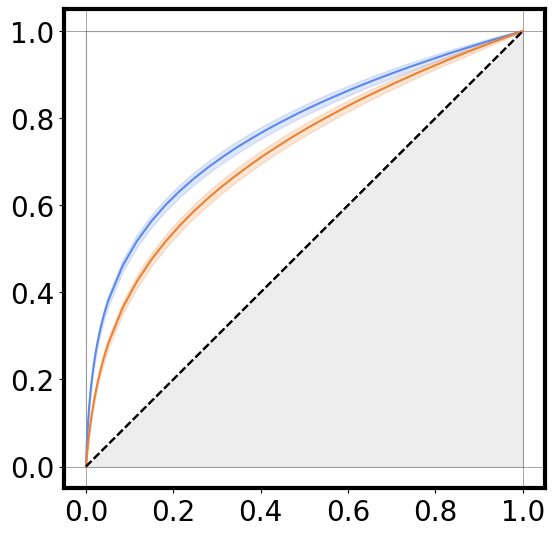

In [16]:
fig, ax = plt.subplots(figsize=(6.2, 6.22))

# add vertical/horizontal lines
ax.axhline(y=0, color='black', linewidth=0.5, linestyle='-', alpha=0.5)
ax.axhline(y=1, color='black', linewidth=0.5, linestyle='-', alpha=0.5)
ax.axvline(x=0, color='black', linewidth=0.5, linestyle='-', alpha=0.5)
ax.axvline(x=1, color='black', linewidth=0.5, linestyle='-', alpha=0.5)

# add diagonal line
ax.plot([0, 1], [0, 1], color='black', linewidth=1.5, linestyle='--')

# add lower triangle (greyed out)
ax.fill_between([0, 1, 1, 0], [0, 0, 1, 0], 1, color='darkgrey', alpha=0.2)

# specify observation time
observe_time = 30

#################################
df1 = no_recovery_output_df[(no_recovery_output_df.observe_time == observe_time)]
df1_sfs = df1.sf.values
df1_medians = df1['median'].values
df1_lws = df1['lw_95CI'].values
df1_ups = df1['up_95CI'].values

# plot median and 95% CI
ax.plot(df1_sfs, df1_medians, label='E', color='#5C89EC')
ax.fill_between(df1_sfs, df1_lws, df1_ups, color='#5C89EC', alpha=0.2)

#################################
df2 = with_recovery_output_df[(with_recovery_output_df.observe_time == observe_time)]
df2_sfs = df2.sf.values
df2_medians = df2['median'].values
df2_lws = df2['lw_95CI'].values
df2_ups = df2['up_95CI'].values

# plot median and 95% CI
ax.plot(df2_sfs, df2_medians, label='F', color='#EE8131')
ax.fill_between(df2_sfs, df2_lws, df2_ups, color='#EE8131', alpha=0.2)

# add diagonal line
ax.plot([0, 1], [0, 1], color='black', linestyle='--')

# adjust x-axis font size
plt.xticks(fontsize=20)
# adjust y-axis font size
plt.yticks(fontsize=20)

# add plot border
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)

# export
fig.savefig('./figures/with_and_without_recovery_lineage_detection_probs.pdf', bbox_inches='tight')